# Assignment 2, Data Science Fundamentals


In [4]:
# Using matplotlib for visulization of data and pandas for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
import scipy as sp
from scipy import stats
from scipy.stats import pearsonr
from scipy import sqrt
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from mpl_toolkits.basemap import Basemap
import demjson

In [5]:
#This is to show plots/graphs inline in ipython notebook
%matplotlib inline
pd.options.mode.chained_assignment = None

In [6]:
#importing data from csv to pandas dataframe
df = pd.read_csv('data/country-data.csv')

In [7]:
# Replacing value "unknown" to numpy.NaN to make the handing of data easy
df.replace(to_replace='unknown', value=np.NaN, inplace=True)

In [8]:
# this is erroneous form of value in one of the column, which is creating issues in calculation, making it correct
df.replace(to_replace='1.78%', value='1.78', inplace=True)

# Task 1 

# 1. Scatter Plot

We are going to draw a Scatter plot between population and labor force of the countries, so see how strong co-relation they have.

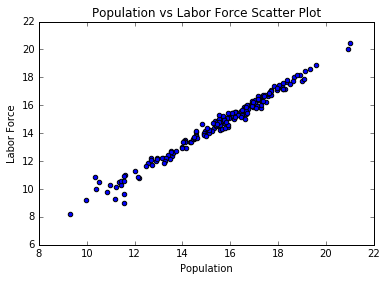

In [9]:
scatter_df = pd.DataFrame()
scatter_df['Population'] = df['Population']
scatter_df['Labor Force'] = df['Labor Force']
plt.scatter(np.log(pd.to_numeric(scatter_df['Population'])),np.log(pd.to_numeric(scatter_df['Labor Force'])))
plt.xlabel("Population")
plt.ylabel("Labor Force")
plt.title("Population vs Labor Force Scatter Plot")

As we can see from above scatter plot, population and labor force have some kind of linear relationship, as population increases labor force also increases. we can conclude that increasing population contribute towards labor force of the country.

# 2. Bar Chart

We are going to plot a bar chart between different countries area range and military expenditure, to figure out if military expenditure has some kind of relationship with area of the country.

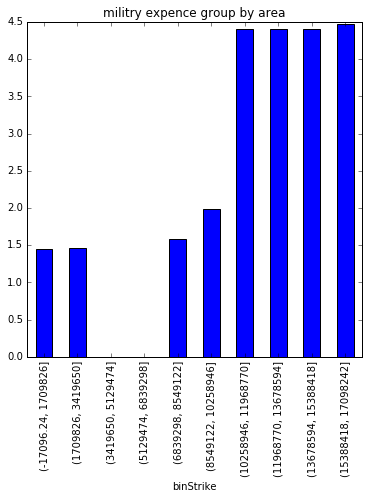

In [10]:
# Building DataFrame for bar chart
bar_df = pd.DataFrame()

#Taking Area and military expenditure to find out the relation between the two
bar_df = df[['Area (sq km)','Military Expenditure/GDP']]

#converting area and military expenditure columns to numeric
bar_df['Area (sq km)'] = pd.to_numeric(bar_df['Area (sq km)'])
bar_df['Military Expenditure/GDP'] = pd.to_numeric(bar_df['Military Expenditure/GDP'])

#Dropping NaN columns because they are not going to be relevant 
bar_df.dropna()

smallestArea = np.min(bar_df['Area (sq km)'])
largestArea = np.max(bar_df['Area (sq km)'])
edges = 10

# finding bins of different areas so that we can group by area
ind = np.digitize(bar_df['Area (sq km)'], np.linspace(smallestArea,largestArea,edges))
bar_df['binStrike'] = pd.cut(bar_df['Area (sq km)'], bins=10)

#group by the military expenditure based on the area and plot a bar chart
groupby_area = bar_df['Military Expenditure/GDP'].groupby(bar_df['binStrike'])
groupby_area.median().plot(kind='bar', title = "militry expence group by area", figsize=(6,6))


As we can see from above bar chart, countries which are falling around same bins are having similar military expenditure. Also as the area increases military expenditure increases for a country. we can see 2 bins showing no data in chart, that means in our data set no country was falling in this area range.

# 3. Histogram



We will try to look at distribution of different factors accross countries.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xaa287c2c>,
        <matplotlib.axes._subplots.AxesSubplot object at 0xa8513a2c>]], dtype=object)

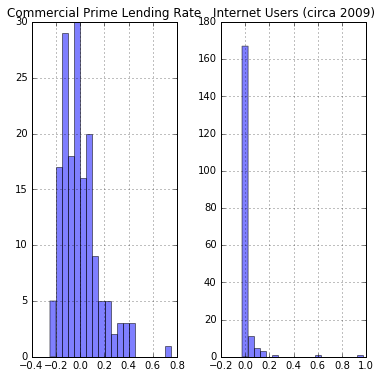

In [11]:
#making dataframe for histograms to see the distribution of these factors
hist_df = df[['Commercial Prime Lending Rate','Internet Users (circa 2009)']]

#converting these factors to numeric to plot
hist_df['Internet Users (circa 2009)'] = pd.to_numeric(hist_df['Internet Users (circa 2009)'])
hist_df['Commercial Prime Lending Rate'] = pd.to_numeric(hist_df['Commercial Prime Lending Rate'])

#normalizing the dataframe varialbles
hist_df_norm = (hist_df - hist_df.mean()) / (hist_df.max() - hist_df.min())

#ploting the histograms
hist_df_norm.hist(figsize = (6,6), alpha=0.5, bins=20)

If we look at above plots, they are giving us some sense of the distribution of variables.
As we can see Commercial prime lending rate is distributed more widely as compare to internet user. That means internet user count lies in certain small range only. Countries either have very high number of internet users or very low number of internet users

# 4. Pie Chart

We will try to check how is the distribution of different government type accross the world.

In [12]:
#making slices for th epie chart
slices = df.groupby(['Government Type']).size()

In [13]:
#labels for the pie chart
govs = slices.keys()

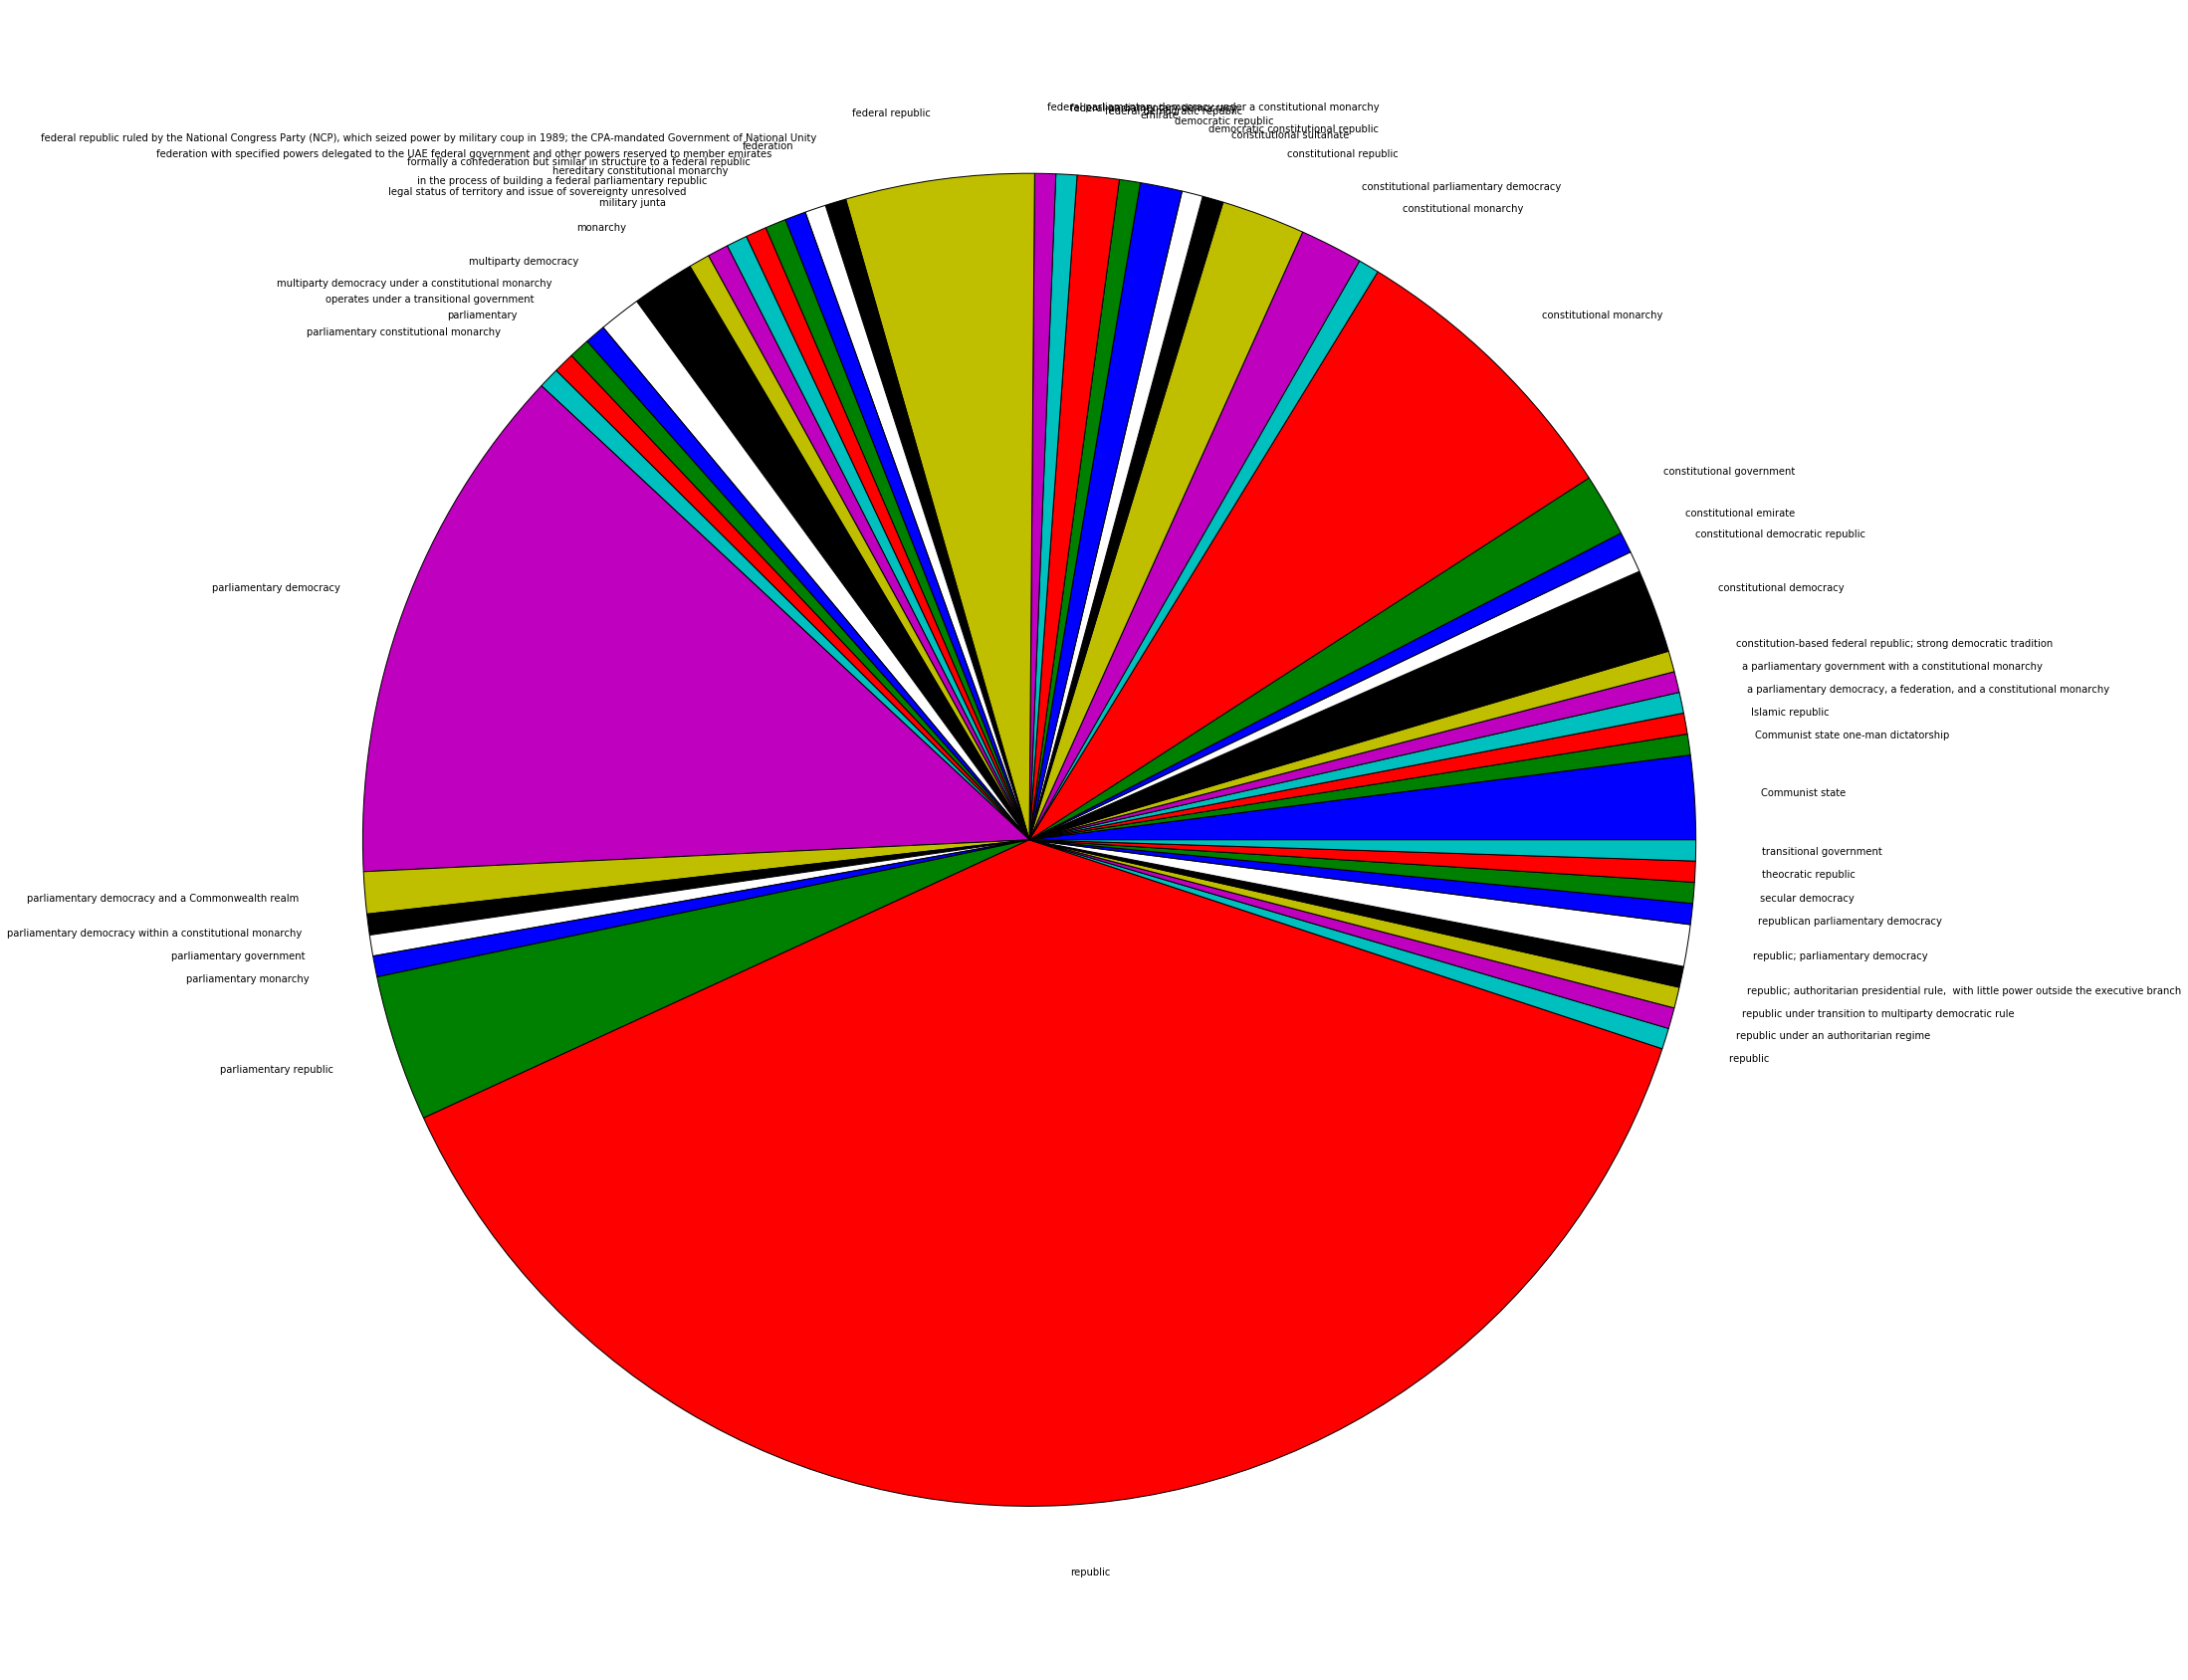

In [14]:
#ploting pie chart for different government type
plt.pie(slices,labels = govs)
fig = plt.gcf()
fig.set_size_inches(30,30)

If we check above plot, we can see most popular government type in the world is republic, second is parliamentry democracy, third is constitutional monarchy.

# 5. Data Map

In [15]:
#Making dataframe for plotting cities,converting latitude and longitude to decimal form
df_map = df[['Latitude of Capital','Longitude of Capital','Literacy Rate (%)']]

latitude_df = df_map['Latitude of Capital'].apply(str).apply(lambda x : pd.Series(x.split(' ')))
longitude_df = df_map['Longitude of Capital'].apply(str).apply(lambda x : pd.Series(x.split(' ')))
latitude_df = latitude_df.rename(columns = {0 : 'lat_deg'})
latitude_df = latitude_df.rename(columns = {1 : 'lat_min'})
latitude_df = latitude_df.rename(columns = {2 : 'lat_dir'})
longitude_df = longitude_df.rename(columns = {0 : 'lon_deg'})
longitude_df = longitude_df.rename(columns = {1 : 'lon_min'})
longitude_df = longitude_df.rename(columns = {2 : 'lon_dir'})

df_loc = pd.concat([latitude_df,longitude_df,df_map['Literacy Rate (%)']], axis=1)

df_loc = df_loc.convert_objects(convert_dates=True, convert_numeric=True, convert_timedeltas=True, copy=True)


df_loc['lat_dd'] = df_loc['lat_deg']+(df_loc['lat_min']*1/60)

df_loc.loc[df_loc['lat_dir'] == 'S','lat_dd'] = df_loc['lat_dd']*-1

df_loc['lon_dd'] = df_loc['lon_deg']+(df_loc['lon_min']*1/60)

df_loc.loc[df_loc['lon_dir'] == 'W','lon_dd'] = df_loc['lon_dd']*-1

df_loc['Literacy Rate (%)'] = (df_loc['Literacy Rate (%)'] - df_loc['Literacy Rate (%)'].min()) /(df_loc['Literacy Rate (%)'].max() - df_loc['Literacy Rate (%)'].min()) 

/home/shilpa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


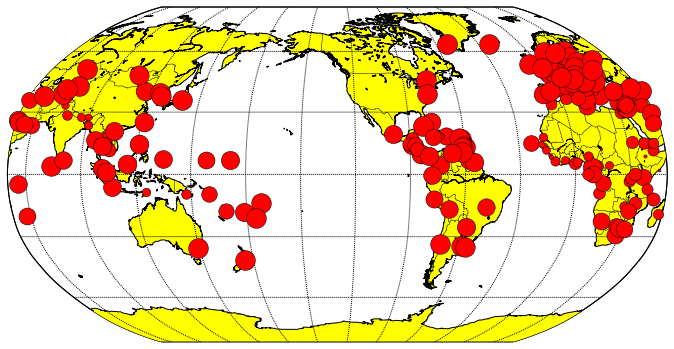

In [16]:
# We will be plotting literacy rate of different countries based on marker size

plt.figure(figsize=(12,6))
world_map = Basemap(projection='robin', lat_0=0, lon_0=-130,
              resolution='l', area_thresh=1000.0)
 
world_map.drawcoastlines()
world_map.drawcountries()
world_map.fillcontinents(color='yellow')
world_map.drawmapboundary()
world_map.drawmeridians(np.arange(0, 360, 30))
world_map.drawparallels(np.arange(-90, 90, 30))

min_marker = 20
for lon, lat, lr in zip(df_loc['lon_dd'].values, df_loc['lat_dd'].values, df_loc['Literacy Rate (%)'].values):
    x,y = world_map(lon,lat)
    msize = min_marker*lr
    world_map.plot(x,y,'ro',markersize=msize)

plt.show()

In above map we are representing literacy rates of different countries by the size of markers, As we can see there are bunch of countries around africa having quite low literacy rate. India is having little low literacy rate as compare to other countries.

# Task 2 

In [15]:
# Making data frame for correlation analysis
# Converting non-numeric values to numeric where ever possible
corr_df = df.convert_objects(convert_dates=True, convert_numeric=True, convert_timedeltas=True, copy=True)

#Dropping all non-numeric columns
corr_df = corr_df.select_dtypes(include=['float64','int64'])

#dropping date of founding, this is a non-relevant factor to check co-relation with
corr_df.drop('Date of Founding/Independence',1, inplace=True)

#normalizing the data values
corr_df_norm = (corr_df - corr_df.mean()) / (corr_df.max() - corr_df.min())

# Replacing NaN values with the mean
corr_df_norm.fillna(corr_df_norm.mean(), inplace=True)

#finding the correlation table
corr_table = corr_df_norm.corr(method='pearson', min_periods = 1)

#replacing 1 values to 0 because these will create issues while calculating max
np.fill_diagonal(corr_table.values, 0)
corr_table.to_csv("corr_table.csv")

#Finding max and minimum corelation
CorrStack = corr_table.stack()
ascSorted = CorrStack.sort_values(ascending=False)
maxCorr = ascSorted.head(1)
desSorted = CorrStack.sort_values(ascending=True)
minCorr = desSorted.head(1)

print("maxCorrelation : ")
maxCorr

maxCorrelation : 


/home/shilpa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


Population  Labor Force    0.980173
dtype: float64

In [16]:
print("maxNegCorrelation : ")
minCorr

maxNegCorrelation : 


Life Expectancy  Commercial Prime Lending Rate   -0.441829
dtype: float64

In [17]:
# P-value test for co-relation between Population and Labor Force
# our Correlation : 0.980173
exptCorr = 0.980173

x = corr_df_norm['Population']
y = corr_df_norm['Labor Force']
countExtreme = 0
for i in range(1000) :
    shuffle(y)
    correlation = x.corr(y)
    if correlation >= exptCorr:
        countExtreme = countExtreme + 1
        
pvalue = (countExtreme+1)/1001

print("P-value after Our 1000 iteration : ")
print(pvalue)

P-value after Our 4000 iteration : 
0


After performing Permutation test for 1000 iterations, p-value is coming as zero, that means pvalue must be very small which we may get after running many interations of permutation test, which will be the probability of correlation to be coming 0.980173 or greater. this pvalue is going to be very less. So we can say that this correlation is quite significant.
Here to calculate p-value for the assignment we are taking into consideration the 1 original permutation as well so the p-value is 1/1001.

In [18]:
# P-value test for co-relation between Population and Labor Force
# our Correlation : 0.980173
exptCorr = -0.441829
x = corr_df_norm['Life Expectancy']
y = corr_df_norm['Commercial Prime Lending Rate']
countExtreme = 0
for i in range(1000) :
    shuffle(y)
    correlation = x.corr(y)
    if correlation <= exptCorr:
        countExtreme = countExtreme + 1 
pvalue = (countExtreme+1)/1001

print("P-value after Our 1000 iteration : ")
print(pvalue)

P-value after Our 4000 iteration : 
0


After performing Permutation test for 1000 iterations, p-value is coming as zero, that means pvalue must be very small which we may get after running many interations of permutation test, which will be the probability of correlation to be coming -0.441829 or lesser. this pvalue is going to be very less. So we can say that this corelation is quite significant.
Here to calculate p-value for the assignment we are taking into consideration the 1 original permutation as well so the p-value is 1/1001.

# Task 3

In [19]:
#Making data Frame for linear regression, converting all possible values to numeric
reg_df = df.convert_objects(convert_dates=True, convert_numeric=True, convert_timedeltas=True, copy=True)

#Taking only relevant colums which may have some correlation with GDP
reg_df = reg_df[['Country Name','Life Expectancy','Area (sq km)', 'Land Boundaries (km)', 'Coastline (km)', 'Literacy Rate (%)', 'Health Expenditure/GDP', 'Military Expenditure/GDP', 'Renewable Water Resources (cu km)', 'Net Migration Rate/1000 Population', 'Labor Force', 'Internet Users (circa 2009)', 'Commercial Prime Lending Rate']]
reg_df.set_index(['Country Name'], inplace=True)
gdp_df = pd.DataFrame()
gdp_df['Population'] = pd.DataFrame(df['Population'])
gdp_df['GDP (PPP) in US $'] = df['GDP (PPP) in US $']
gdp_df['Country Name'] = df['Country Name']
gdp_df.set_index(['Country Name'], inplace=True)
gdp_df['GDP per capita'] = gdp_df['GDP (PPP) in US $'] / gdp_df['Population']
target = gdp_df['GDP per capita']

/home/shilpa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


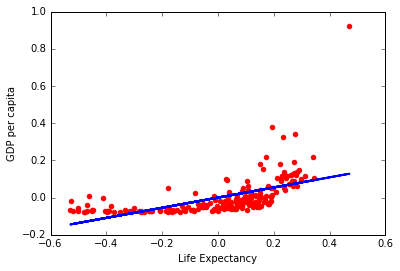

Square Error : 
[ 0.08594339]


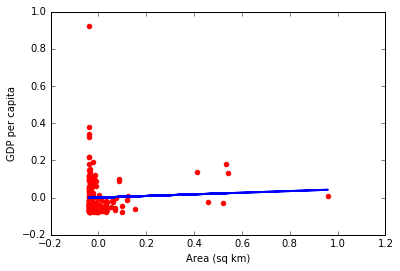

Square Error : 
[ 0.10495969]


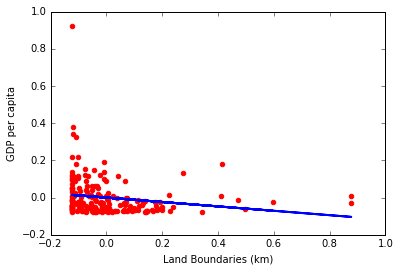

Square Error : 
[ 0.10345376]


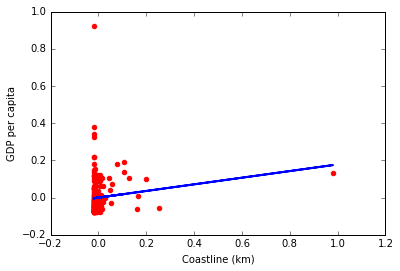

Square Error : 
[ 0.10413258]


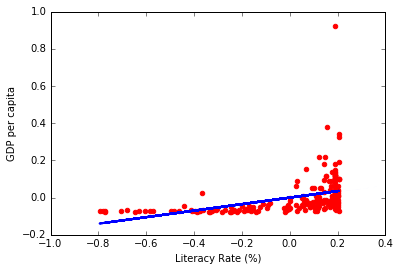

Square Error : 
[ 0.0954889]


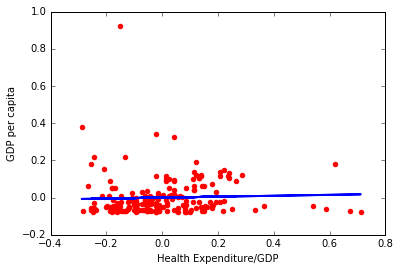

Square Error : 
[ 0.10499086]


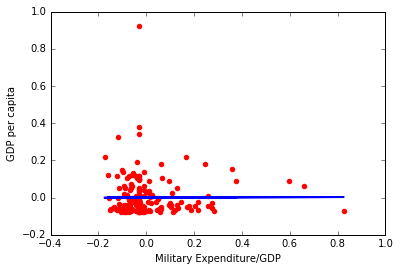

Square Error : 
[ 0.10507281]


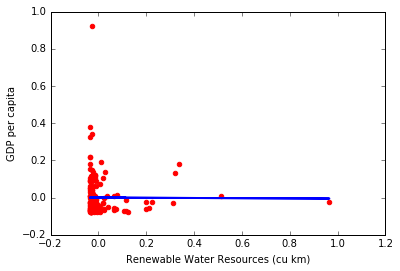

Square Error : 
[ 0.10507267]


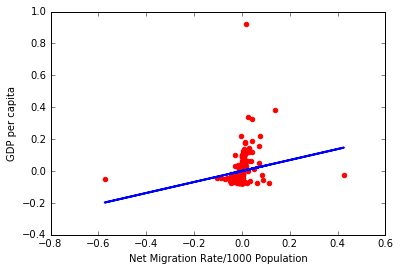

Square Error : 
[ 0.10317466]


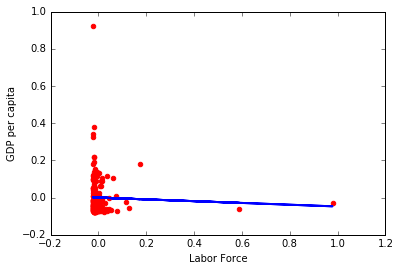

Square Error : 
[ 0.10499411]


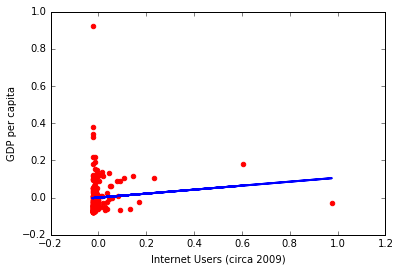

Square Error : 
[ 0.10463884]


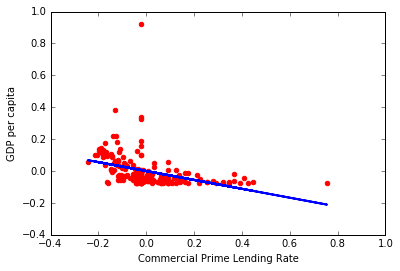

Square Error : 
[ 0.09728174]
Minimum square error : 
[ 0.08594339]
Mininum square error index : 
Life Expectancy
Most Above forcast country : 
Monaco
Most below forcast country : 
Guinea-Bissau


In [20]:
#Dropping non numeric columns
reg_df.select_dtypes(include=['float64','int64'])

#Replacing NaN values with mean
reg_df.fillna(reg_df.median(), inplace=True)
target.fillna(target.median(), inplace=True)

#normalization
reg_df_norm = (reg_df - reg_df.mean()) / (reg_df.max() - reg_df.min())
target = (target - target.mean()) / (target.max() - target.min())


#After normalization our error range should be less, assiging initial value a big int
minErr = 10000

#Plotting linear regression for GDP 
for index in reg_df_norm.columns.values:
    regr = linear_model.LinearRegression()
    regr.fit(reg_df_norm[index].reshape(197,1), target.reshape(197,1))
    for x, y in zip(reg_df_norm[index].reshape(197,1), target.reshape(197,1)):
        plt.scatter( x, y, color='r',s=20)  
    plt.plot(reg_df_norm[index].reshape(197,1), regr.predict(reg_df_norm[index].reshape(197,1)), color='blue',
        linewidth=2)
    plt.xlabel(index)
    plt.ylabel('GDP per capita')
    plt.show()
    sqr_error = sqrt(sum((target.reshape(197,1) - regr.predict(reg_df_norm[index].reshape(197,1)))**2)/197)
    print("Square Error : ")
    print(sqr_error)
    if sqr_error < minErr :
        minErr = sqr_error
        minX = index

print("Minimum square error : ")
print(minErr)

print("Mininum square error index : ")
print(minX)

#Determining most above and below forcast countries
distance_df = pd.DataFrame(target)
prediction = [inner_item for item in list(regr.predict(reg_df_norm[minX].reshape(197,1))) for inner_item in item]
distance_df['predicted_GDP'] = pd.Series(prediction,index = distance_df.index)

distance_df['difference'] = distance_df['GDP per capita'] - distance_df['predicted_GDP']

print("Most Above forcast country : ")
print(distance_df['difference'].argmax())

print("Most below forcast country : ")
print(distance_df['difference'].argmin())


As we can observe from above linear regressions minimum square error is coming for
Life Expectancy vs GDP per capita

In this regression country most above forcast is Monaco and most below forcast is Guinea-Bissau. Manaco is falling out of analysis because its GDP per capita is very high, other countries GDP per capita is in similar range of 5 digit numbers but monaco's GDP per capita is in 6 digit number. On the other hand Guinea-Bissau has one of the lowest life expectancy and its GDP per capita is also quite low with compare to other countris having similar life expectancy. Still Guinea-Bissau is not a outlier if we look in the plot, but monaco is a clear outlier.





# Task 4

We will try to find out social welfare ranking of different countries based on different factors.

In [21]:
#Building dataframe by taking only relevant factors into consideration
#Factors we are considering  are
rank_df = df[['Country Name','Population','Life Expectancy','GDP (PPP) in US $','Literacy Rate (%)','Labor Force']]

#Converting objects into numeric where ever possible
rank_df = rank_df.convert_objects(convert_dates=True, convert_numeric=True, convert_timedeltas=True, copy=True)

#Setting country name as index of the dataframe
rank_df.set_index(['Country Name'], inplace=True)

#Converting labor force to "ratio of population into labor force" to make it more relevant
rank_df['Labor Force_perc'] = (rank_df['Labor Force']/rank_df['Population'])

#normalization
rank_df = (rank_df - rank_df.median()) / (rank_df.max() - rank_df.min())

#Replacing Nan values by median
rank_df.fillna(rank_df.median(), inplace=True)

/home/shilpa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Population,Life Expectancy,GDP (PPP) in US $,Literacy Rate (%),Labor Force,Labor Force_perc
Country Name,,,,,,
Afghanistan,0.018051,-0.566658,0.000157,-0.895890,0.005189,-0.123107
Albania,-0.003195,0.117867,-0.000857,0.045205,-0.002852,-0.045613
Algeria,0.023208,0.078744,0.014476,-0.286301,0.009751,-0.091979
Andorra,-0.005360,0.234737,-0.002363,0.089041,-0.004184,-0.010110
Angola,0.008657,-0.447047,0.005331,-0.316438,0.007078,0.020573
Antigua and Barbuda,-0.005355,0.072016,-0.002456,0.075342,-0.004191,-0.066854
Argentina,0.026314,0.106653,0.043561,0.060274,0.017486,-0.021901
Armenia,-0.003165,0.022178,-0.001319,0.083562,-0.002481,0.010252
Australia,0.011180,0.220284,0.057155,0.075342,0.011368,0.069357


Now we have 4 factors into consideration to determine the social welfare rank of country.

1. Life Expectancy
2. GDP
3. Literacy Rate
4. Labor force ratio

We will assign different weights to these factors according to their importance in social welfare and calculate a score.
This score will determine the rank of the country. More the value of this score is, better the country rank in social welfare.

Weights :
1. Life Expectancy : This is an important factor for a contry's social welfare. It is an indicator of good social situation in a country. It plays a important role so assigning it the weightage of 0.4.

2. GDP : GDP may contribute towards social welfare situation of a country but to so much as compare to other factors. so assiging it the weight of 0.1.

3. Literacy Rate : This is an important factor to indicate social welfare of a country, Literacy rate closely associated with the welfare of country, so assigning it weight of 0.35.

4. Labor Force : The more portion of population is contributing in the labore force, the better social situation of the country will be. assigning it the weight of 0.2

In [22]:
#calculating score based on weightage of different factors
rank_df['score'] = 0.4*rank_df['Life Expectancy'] + 0.10*rank_df['GDP (PPP) in US $']+0.35*rank_df['Literacy Rate (%)']+0.2*rank_df['Labor Force_perc']

#Extracting top 20 countries
rank_df.sort(columns=['score'], ascending=False)

/home/shilpa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Population,Life Expectancy,GDP (PPP) in US $,Literacy Rate (%),Labor Force,Labor Force_perc,score
Country Name,,,,,,,
Monaco,-0.005400,0.407177,-0.002180,0.075342,-0.004163,0.779193,0.344861
United States,0.229804,0.157737,0.997450,0.075342,0.190606,0.029612,0.195132
Liechtenstein,-0.005395,0.210566,-0.002361,0.089041,-0.004184,0.317078,0.178570
Japan,0.088333,0.279841,0.280284,0.075342,0.078043,0.047215,0.175777
Singapore,-0.001316,0.277847,0.017723,0.032877,0.000089,0.109419,0.146302
Switzerland,0.000524,0.228258,0.019649,0.075342,0.002010,0.108593,0.141357
San Marino,-0.005398,0.247944,-0.002474,0.034247,-0.004201,0.141078,0.139132
Australia,0.011180,0.220284,0.057155,0.075342,0.011368,0.069357,0.134070
Canada,0.020273,0.210316,0.088238,0.075342,0.019693,0.066334,0.132587


Top 20 countries as per our ranking system
1. Monaco 
2. United States
3. Liechtenstein
4. Japan
5. Singapore
6. Switzerland
7. San Marino
8. Australia
9. Canada
10. Germany
11. Norway
12. France
13. Sweden
14. China
15. Andorra
16. Italy
17. Iceland
18. New Zealand
19. United Kingdom
20. Spain

If we tally above mentioned ranking "monaco" is coming on top, the reason behind is it has best life expectancy, literacy rate and labor force among all other countries, these are most contributing factors in our ranking system. "US" is coming next, US is doing moderate in other criterias but main reason behind USA's second rank is GDP. USA has highest GDP among all other countries, although GDP does not have much say in our ranking but since USA has highest GDP, it is making a difference. I think USA could have come a little below.

Next is "Liechtenstein" the reason behind is it has 100% literacy rate and has 0.96 population contribution toward's country's labor force. It has moderate life expectancy which puts it on 3rd rank in our ranking system. "japan" is also has a good life expectancy and GDP, It is also doing moderate in literacy rate. 

The worst doing countries are Afghanistan and chad, literacy rate and life expectancy of these countries is very low. which are the major contributors in our ranking system.



# Task 5

We will be calculating Ecludian distance to find out how similar/dissimilar 2 countries are.

In [27]:
#Creating a dataframe for distance function, by taking relevent values
disDf = df[['Country Name','Population','Life Expectancy','GDP (PPP) in US $','Area (sq km)','Land Boundaries (km)','Coastline (km)','Literacy Rate (%)','Health Expenditure/GDP','Military Expenditure/GDP','Renewable Water Resources (cu km)','Net Migration Rate/1000 Population','Labor Force','Internet Users (circa 2009)','Commercial Prime Lending Rate']]

#setting country name as index
disDf.set_index(['Country Name'], inplace=True)

#Converting data types to numeric where ever possible
disDf = disDf.convert_objects(convert_dates=True, convert_numeric=True, convert_timedeltas=True, copy=True)

#filling NaN with mean
disDf.fillna(disDf.mean(), inplace=True)

/home/shilpa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Population,Life Expectancy,GDP (PPP) in US $,Area (sq km),Land Boundaries (km),Coastline (km),Literacy Rate (%),Health Expenditure/GDP,Military Expenditure/GDP,Renewable Water Resources (cu km),Net Migration Rate/1000 Population,Labor Force,Internet Users (circa 2009),Commercial Prime Lending Rate
Country Name,,,,,,,,,,,,,,
Afghanistan,31822848,50.49,45300000000,652230.0,5987.0,0.0,28.100000,9.600000,4.740000,65.330000,-1.830000,7512000.0,1.000000e+06,15.000000
Albania,3020209,77.96,28340000000,28748.0,691.0,362.0,96.800000,6.300000,1.470000,41.700000,-3.310000,1098000.0,1.300000e+06,9.520000
Algeria,38813722,76.39,284700000000,2381741.0,6734.0,998.0,72.600000,3.900000,4.480000,11.670000,-0.930000,11150000.0,4.700000e+06,8.000000
Andorra,85458,82.65,3163000000,468.0,118.0,0.0,100.000000,7.200000,1.934429,313.004651,0.000000,36060.0,6.710000e+04,11.113735
Angola,19088106,55.29,131800000000,1246700.0,5369.0,1600.0,70.400000,3.500000,3.630000,148.000000,0.470000,9018000.0,6.067000e+05,15.000000
Antigua and Barbuda,91295,76.12,1610000000,442.6,0.0,153.0,99.000000,5.900000,1.934429,0.050000,2.230000,30000.0,6.500000e+04,10.300000
Argentina,43024374,77.51,771000000000,2780400.0,11968.0,4989.0,97.900000,8.100000,0.910000,814.000000,0.000000,17320000.0,1.369400e+07,16.400000
Armenia,3060631,74.12,20610000000,29743.0,1570.0,0.0,99.600000,4.300000,3.920000,7.770000,-5.880000,1394000.0,2.082000e+05,16.500000
Australia,22507617,82.07,998300000000,7741220.0,0.0,25760.0,99.000000,9.000000,1.710000,492.000000,5.740000,12440000.0,1.581000e+07,6.200000


In [28]:
#normalizing the data
disDf_norm = (disDf - disDf.mean()) / (disDf.max() - disDf.min())

In [29]:
#Creating Euclidian distance data frame
ecluDf = pd.DataFrame()
for x in disDf_norm.index.values:
    s = pd.Series()
    for y in disDf_norm.index.values:
        dis = plt.mlab.dist(disDf_norm.loc[x,:],disDf_norm.loc[y,:])
        s=s.append(pd.Series(dis,index=[y]))
    ecluDf[x] = s

In [30]:
#Replacing 0 with numpy NaN values so that these values does not interfare with min and max calculations
ecluDf.replace(to_replace=0, value=np.NaN, inplace=True)

In [31]:
#Creating a dataframe to list out nearest and farthest country from a particular country
compareDf = pd.DataFrame([ecluDf.idxmax(axis=0, skipna=True), ecluDf.idxmin(axis=0, skipna=True)], index=['farthest', 'nearest'])
compareDf.to_csv("distance.csv")
compareDf.head(10)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
farthest,China,China,China,China,China,China,China,China,China,China,...,Madagascar,China,China,China,China,China,China,China,China,China
nearest,Somalia,Dominica,Morocco,Liechtenstein,Cameroon,Albania,Chile,Azerbaijan,New Zealand,Belgium,...,Germany,Croatia,Belarus,Fiji,Peru,Ecuador,Cambodia,Sao Tome and Principe,Mozambique,Malawi


In [32]:
#Finding out pair of countries which are farthest and nearest
ecluDfStack = ecluDf.stack()
ascSorted_eclu = ecluDfStack.sort_values(ascending=False)
maxdis = ascSorted_eclu.head(1)
desSorted = ecluDfStack.sort_values(ascending=True)
mindis = desSorted.head(1)


print("farthest countries")
print(maxdis)
print("nearest countries")
print(mindis)

farthest countries
China  Sierra Leone    2.525559
dtype: float64
nearest countries
Liechtenstein  Andorra    0.03609
dtype: float64


a. If we observe above mentioned values, I can see the nearest country to india is pakistan, which is pretty accurate since india and pakistan have around same "Life Expectancy", "Literacy Rate", "Commercial prime lending rate". If we observe other sets of nearest country pair as well (china, india), (Australia, new zealand), we can see these countries are also similar in above mentioned aspect.

b. Many of these pairs (Afghanistan, Somalia), (Australia, New Zealand), (India, China) have quite different GDP, but still being shown as nearest pairs. Looks like GDP has not been given much importance after normalization of data. 

c. Farthest country from most of the country is china, the reason behind is its population, population of china is extraorinarily high, which is overcoming other factors in consideration. 

In [17]:
#Creating JSON Output

output = {
    "Email": "shilgupta@cs.stonybrook.edu",
    "Name": "shilpa gupta",
    "Q2": {
        "Negative": {
            "Attr0": "Life Expectancy",
            "Attr1": "Commercial Prime Lending Rate",
            "coeff": -0.4418,
            "pValue": 0.001
        },
        "Positive": {
            "Attr0": "Population",
            "Attr1": "Labor Force",
            "coeff": 0.9801,
            "pValue": 0.001
        }
    },
    "Q3": {
        "Attr": "Life Expectancy",
        "SquaredError": 0.0859
    },
    "SBUID": "110948405"
}

json_out = demjson.encode(output)
open("HW2.json","wb").write(json_out)